# E-Commerce CRM Analytcis

In [ ]:
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x)

c:\Users\GHOST-V3\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("data.csv",
                 header=0,
                 encoding='unicode_escape',
                 dtype={'CustomerID': str,
                        'InvoiceID': str},
                 parse_dates=['InvoiceDate'], 
                 infer_datetime_format=True)
df.head()


C:\Users\GHOST-V3\AppData\Local\Temp\ipykernel_152152\215130446.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv("data.csv",


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850,United Kingdom


In [3]:
def check_df(dataframe, head=5):
    print("########## Info #############")
    print(dataframe.info())
    print("########## Shape #############")
    print(dataframe.shape)
    print("########## Data Types #############")
    print(dataframe.dtypes)
    print("########## Head of Data #############")
    print(dataframe.head(head))
    print("########## Tail of Data #############")
    print(dataframe.tail(head))
    print("########## Null Values of Data #############")
    print(dataframe.isnull().sum())
    print("########## Describe of the Numerical Datas #############")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

########## Info #############
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB
None
########## Shape #############
(541909, 8)
########## Data Types #############
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID    

In [4]:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850,United Kingdom,15.300
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850,United Kingdom,20.340
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850,United Kingdom,22.000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850,United Kingdom,20.340
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850,United Kingdom,20.340


In [5]:
df.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
TotalPrice          0
dtype: int64

In [6]:
df.dropna(inplace=True)


In [7]:
df.describe().T


,count,mean,min,25%,50%,75%,max,std
Quantity,406829.000,12.061,-80995.000,2.000,5.000,12.000,80995.000,248.693
InvoiceDate,406829,2011-07-10 16:30:57.879207424,2010-12-01 08:26:00,2011-04-06 15:02:00,2011-07-31 11:48:00,2011-10-20 13:06:00,2011-12-09 12:50:00,NaN
UnitPrice,406829.000,3.460,0.000,1.250,1.950,3.750,38970.000,69.315
TotalPrice,406829.000,20.402,-168469.600,4.200,11.100,19.500,168469.600,427.592


In [8]:
df = df[~df["InvoiceNo"].str.contains("C", na = False)]
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,397924.000,13.022,1.000,2.000,6.000,12.000,80995.000,180.420
InvoiceDate,397924,2011-07-10 23:43:36.912475648,2010-12-01 08:26:00,2011-04-07 11:12:00,2011-07-31 14:39:00,2011-10-20 14:33:00,2011-12-09 12:50:00,NaN
UnitPrice,397924.000,3.116,0.000,1.250,1.950,3.750,8142.750,22.097
TotalPrice,397924.000,22.395,0.000,4.680,11.800,19.800,168469.600,309.056


In [9]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  object        
 7   Country      397924 non-null  object        
 8   TotalPrice   397924 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 30.4+ MB


In [10]:
df["InvoiceDate"].max()


Timestamp('2011-12-09 12:50:00')

In [11]:
today_date = dt.datetime(2011, 12, 11)


In [13]:
# Calculate Recency, Frequency, and Monetary values
rfm = df.groupby('CustomerID').agg({
	'InvoiceDate': lambda x: (today_date - x.max()).days,
	'InvoiceNo': 'nunique',
	'TotalPrice': 'sum'
}).reset_index()

# Rename the columns
rfm.columns = ['CustomerID', 'recency', 'frequency', 'monetary']
rfm.head()

,CustomerID,recency,frequency,monetary
0,12346,326,1,77183.600
1,12347,3,7,4310.000
2,12348,76,4,1797.240
3,12349,19,1,1757.550
4,12350,311,1,334.400


In [14]:
rfm = rfm[rfm["monetary"] >0]


In [15]:
rfm["recency_score"]   = pd.qcut(rfm["recency"], 5, labels = [5,4,3,2,1])
rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method = "first"), 5, labels = [1,2,3,4,5])
rfm["monetary_score"]  = pd.qcut(rfm["monetary"], 5, labels = [1,2,3,4,5])
rfm["RFM_SCORE"]       = (rfm['recency_score'].astype(str) + rfm["frequency_score"].astype(str))

rfm.head()

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
0,12346,326,1,77183.600,1,1,5,11
1,12347,3,7,4310.000,5,5,5,55
2,12348,76,4,1797.240,2,4,4,24
3,12349,19,1,1757.550,4,1,4,41
4,12350,311,1,334.400,1,1,2,11


In [16]:
seg_map = {r'[1-2][1-2]': 'hibernating',
           r'[1-2][3-4]': 'at_Risk',
           r'[1-2]5': 'cant_loose',
           r'3[1-2]': 'about_to_sleep',
           r'33': 'need_attention',
           r'[3-4][4-5]': 'loyal_customers',
           r'41': 'promising',
           r'51': 'new_customers',
           r'[4-5][2-3]': 'potential_loyalists',
           r'5[4-5]': 'champions'}

rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex = True)

rfm.head()

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,12346,326,1,77183.600,1,1,5,11,hibernating
1,12347,3,7,4310.000,5,5,5,55,champions
2,12348,76,4,1797.240,2,4,4,24,at_Risk
3,12349,19,1,1757.550,4,1,4,41,promising
4,12350,311,1,334.400,1,1,2,11,hibernating


In [17]:
rfm["segment"].value_counts()


segment
hibernating            1071
loyal_customers         819
champions               633
at_Risk                 593
potential_loyalists     484
about_to_sleep          352
need_attention          187
promising                94
cant_loose               63
new_customers            42
Name: count, dtype: int64

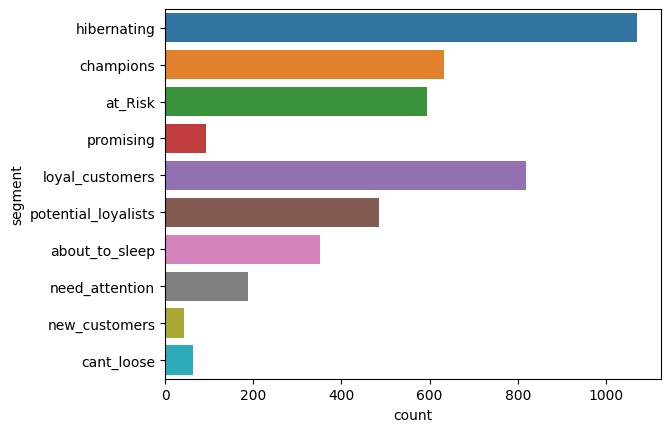

In [18]:
sns.countplot(y ='segment', data = rfm)
 
# Show the plot

plt.show()